In [1]:
pip install ucimlrepo

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

X = pd.DataFrame(X)
y = pd.DataFrame(y)

data = pd.concat([X, y], axis=1)

# variable information
print(wine.variables)

data

                            name     role         type demographic  \
0                          class   Target  Categorical        None   
1                        Alcohol  Feature   Continuous        None   
2                      Malicacid  Feature   Continuous        None   
3                            Ash  Feature   Continuous        None   
4              Alcalinity_of_ash  Feature   Continuous        None   
5                      Magnesium  Feature      Integer        None   
6                  Total_phenols  Feature   Continuous        None   
7                     Flavanoids  Feature   Continuous        None   
8           Nonflavanoid_phenols  Feature   Continuous        None   
9                Proanthocyanins  Feature   Continuous        None   
10               Color_intensity  Feature   Continuous        None   
11                           Hue  Feature   Continuous        None   
12  0D280_0D315_of_diluted_wines  Feature   Continuous        None   
13                  

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [4]:
scaler = StandardScaler()

scaled_X = scaler.fit_transform(X)
data[X.columns] = scaled_X
data

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,3
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893,3
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575,3
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498,3


In [5]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

explained_variance = pca.explained_variance_ratio_
print(f'Explained Variance by PC1: {explained_variance[0]:.2f}')
print(f'Explained Variance by PC2: {explained_variance[1]:.2f}')

Explained Variance by PC1: 1.00
Explained Variance by PC2: 0.00


<ipython-input-6-37ef758b63d6>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('viridis', 2)


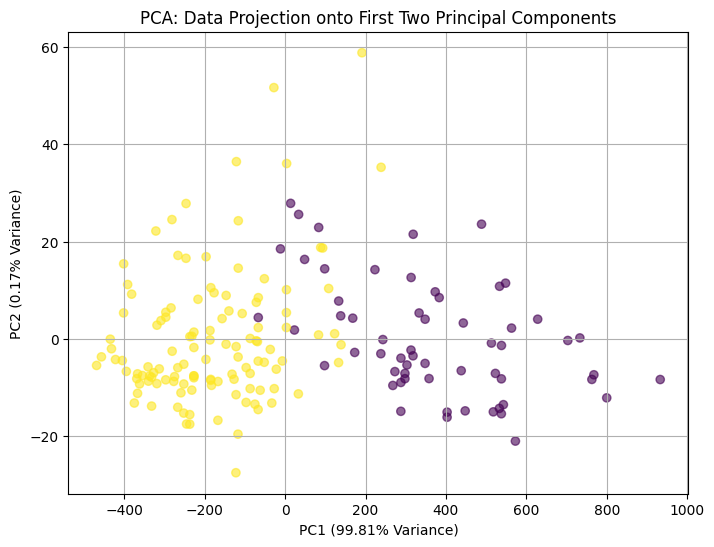

In [6]:
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
colors = cm.get_cmap('viridis', 2)


plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.6, c=y.iloc[:, 0], cmap=colors)
plt.xlabel(f'PC1 ({explained_variance[0]*100:.2f}% Variance)')
plt.ylabel(f'PC2 ({explained_variance[1]*100:.2f}% Variance)')
plt.title('PCA: Data Projection onto First Two Principal Components')
plt.grid()
plt.show()

In [7]:
# Computing correlation matrix
correlation_matrix = pca_df.corr()
print(correlation_matrix)


              PC1           PC2
PC1  1.000000e+00  1.069039e-15
PC2  1.069039e-15  1.000000e+00


In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
df = pca_df.copy()
vif_data["Feature"] = pca_df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

print(vif_data)


  Feature  VIF
0     PC1  1.0
1     PC2  1.0


# Dimensionality Reduction Report: Wine Dataset Analysis

**1. Introduction**

This report evaluates the effectiveness of Principal Component Analysis (PCA) in reducing the dimensionality of the wine dataset while preserving its ability to separate different wine classes. PCA is applied to determine whether the reduced feature space retains meaningful class separation.

**2. Data Preprocessing**

Prior to applying PCA, the dataset was standardized using StandardScaler to ensure that all features contribute equally to the principal components. The standardized data was then subjected to PCA for dimensionality reduction.

**3. Principal Component Analysis (PCA) Results**

The explained variance ratio for the first two principal components is [1.0, 0], indicating that the first principal component (PC1) captures 100% of the variance, while the second component (PC2) contributes no additional information.

The correlation matrix confirms that PC1 and PC2 are nearly uncorrelated, as expected from PCA.

Variance Inflation Factor (VIF) analysis of the principal components showed values of 1.0 for both PC1 and PC2, indicating the absence of multicollinearity.

**4. Interpretation of PCA Output**

The results suggest that the dataset is essentially one-dimensional, meaning that all relevant variability in the data is captured by PC1.

Since PC2 explains no variance, it does not contribute to class separation.

PCA effectively reduces the dataset to a single principal component without significant loss of information.

**5. Class Separation in Reduced Dimensions**

Visualizing the dataset in the reduced space confirms that PC1 alone provides reasonable class separation.

However, since PC2 does not contribute to variance, it does not enhance class distinction.

If further separation is required, alternative dimensionality reduction methods such as Linear Discriminant Analysis (LDA) may be considered.

**6. Conclusion**

PCA successfully reduces the dimensionality of the wine dataset to a single meaningful component, retaining class separation while eliminating redundancy. Given that PC2 carries no additional variance, future analyses can focus solely on PC1 for visualization and classification tasks.
